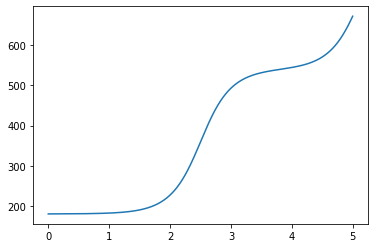

In [8]:
import numpy as np
import pylab as plt

m = 1
g = 9.81
lam = 0.0
l = 1.0

y0_init = 180.0 * np.pi/180.0
y1_init = 0.01

dt = 0.001
t_dat = np.arange(0.0, 5.0, dt)
y0 = y0_init
y1 = y1_init
y0_dat = []
y1_dat = []
for t in t_dat:
  y0_dat.append(y0)
  y1_dat.append(y1)

  y0_new = y0 + (y1)*dt
  y1_new = y1 + (-lam/m*y1 - g/l*np.sin(y0))*dt

  y0 = y0_new
  y1 = y1_new

theta_dat = [180.0/np.pi * y0 for y0 in y0_dat]
plt.plot(t_dat, theta_dat)  
plt.show()








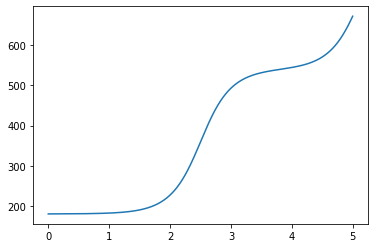

In [11]:
import numpy as np
import pylab as plt

m = 1
g = 9.81
lam = 0.0
l = 1.0

def f(t, y):
  dydt = []
  dydt.append(y[1])
  dydt.append(-lam/m*y[1] - g/l*np.sin(y[0]))
  return dydt


y_init = [180.0 * np.pi/180.0, 0.01]

dt = 0.001
t_dat = np.arange(0.0, 5.0, dt)
y = y_init
y_dat = [[], []]
y_new = [0.0, 0.0]
for t in t_dat:
  y_dat[0].append(y[0])
  y_dat[1].append(y[1])

  dydt = f(t, y)
  y_new[0] = y[0] + dydt[0]*dt
  y_new[1] = y[1] + dydt[1]*dt

  y[0] = y_new[0]
  y[1] = y_new[1]

theta_dat = [180.0/np.pi * y0 for y0 in y_dat[0]]
plt.plot(t_dat, theta_dat)  
plt.show()

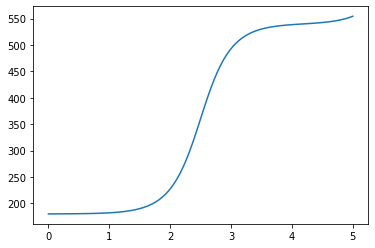

In [20]:
import numpy as np
import pylab as plt
from scipy.integrate import solve_ivp

m = 1
g = 9.81
lam = 0.0
l = 1.0

def f(t, y):
  dydt = []
  dydt.append(y[1])
  dydt.append(-lam/m*y[1] - g/l*np.sin(y[0]))
  return dydt

y_init = [180.0 * np.pi/180.0, 0.01]

t_init = 0
t_final = 5
t_dat = np.linspace(0.0, t_final, 100)


solution = solve_ivp(f, (t_init, t_final), y_init, t_eval=t_dat)

#print(solution)
#print(solution['t'])
#print(solution['y'][1])

theta_dat = [180.0/np.pi *y0 for y0 in solution['y'][0]]
plt.plot(solution['t'], theta_dat)
plt.show()










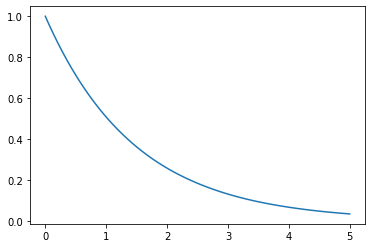

In [30]:
import numpy as np
import pylab as plt
from scipy.integrate import solve_ivp

V = 1 
dotV = 0.01
Cp = 4.184e3
CV = Cp

cAin = 0.0
Tin = 298.15
T_init = 298.15
cA_init = 1.0
DHrxn = 1000.0e3
rho = 1000.0

k0 = 1
E = 1000.0
R = 8.314


def f(t, y):

  T = y[0]
  cA = y[1]
  cB = y[2]
  rxn = k0*np.exp(-E/(R*T))*cA
#  rxn = k0*cA

  dydt = []
  dydt.append(dotV/V*Cp/CV*(Tin-T) + rxn*DHrxn/(rho*CV))
  dydt.append(dotV/V*(cAin-cA)-rxn)
  dydt.append(-dotV/V*cB+rxn)

  return dydt

y_init = [T_init, cA_init, 0.0]

t_init = 0
t_final = 5
t_dat = np.linspace(0.0, t_final, 100)


solution = solve_ivp(f, (t_init, t_final), y_init, t_eval=t_dat)

#print(solution)
#print(solution['t'])
#print(solution['y'][1])

t_dat = solution['t']
T_dat = solution['y'][0]
cA_dat = solution['y'][1]
cB_dat = solution['y'][2]


#plt.plot(t_dat, T_dat)
plt.plot(t_dat, cA_dat)
plt.show()















In [ ]:
import numpy as np
import pylab as plt
from scipy.integrate import solve_ivp



def f(t, y):
  dydt = []
  dydt.append(-y[0])
  return dydt

t_init = 0
t_final = 1
t_dat = np.linspace(0.0, 1.0, 100)


y0 = [1.0]
solution = solve_ivp(f, (t_init, t_final), y0, t_eval=t_dat)

#print(solution)


plt.plot(solution['t'], solution['y'][0])
plt.show()
